### Linear Regression

In [1]:
# Importing important packages

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Importing dataset

data = pd.read_csv('Admission_Prediction.csv')

In [3]:
# Reading head of data

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
# number of rows and columns

data.shape

(500, 9)

In [5]:
# Getting summary of dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
# finding count of missing values in each column

data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
# Imputing null values
# imputing all the NaN values with mode into GRE Score columns

data['GRE Score'].fillna(data['GRE Score'].mode()[0],inplace=True)

In [8]:
# Imputing null values
# imputing all the NaN values with mode into TOEFL Score columns

data['TOEFL Score'].fillna(data['TOEFL Score'].mode()[0],inplace=True)

In [9]:
# Imputing null values
# imputing all the NaN values with mode into University Ratings columns

data['University Rating'].fillna(data['University Rating'].mean(),inplace=True)

In [10]:
# Rechecking NaN values after imputing

data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
# dropping chance of Admt and serial number as both are not useful in inputs

x = data.drop(['Chance of Admit','Serial No.'],axis = 1)
y = data['Chance of Admit']

In [12]:
x.head()
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

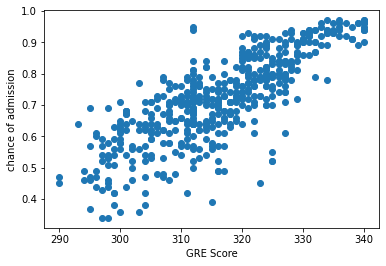

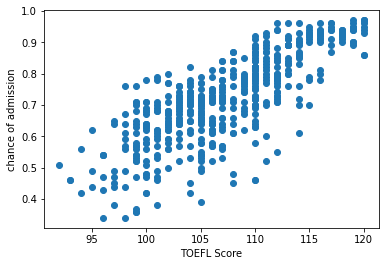

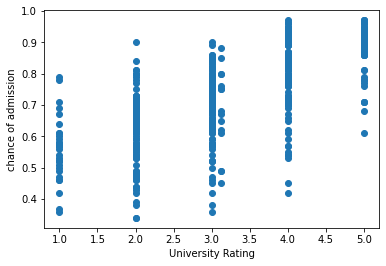

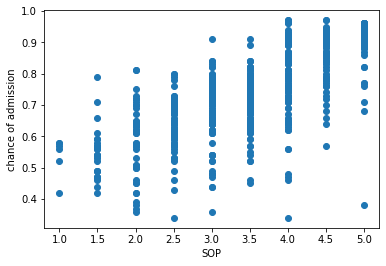

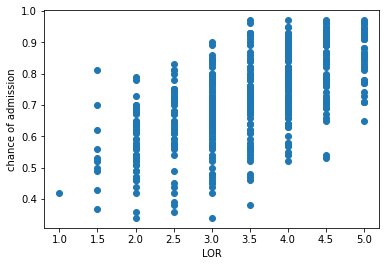

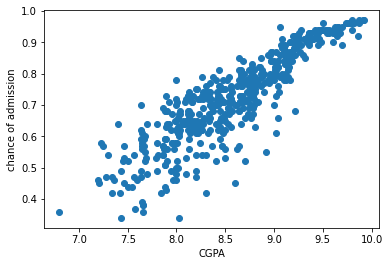

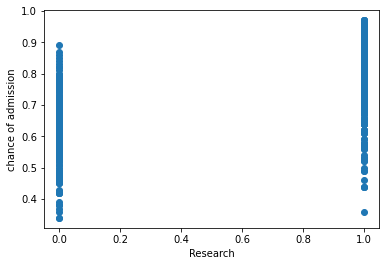

In [13]:
# Checking relationship between each feature with dependent variable

for col in x.columns:
    if(col != ['Chance of Admit']):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('chance of admission')
        plt.show()

In [14]:
# Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaler_label = StandardScaler()
scaled_data_x = scaler_feature.fit_transform(x)

In [15]:
# Splitting the data into tran and test dataset

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.30,random_state = 100)

In [16]:
# Fitting the model

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [17]:
# Calculating the accuracy of model

from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y)
score

0.8182504090621315

In [18]:
# saving the model

file = ('Final_model.pickle')
pickle.dump(reg,open(file,'wb')) # wb is for write binary file type

In [19]:
# reading model to predict new case

loaded_model = pickle.load(open(file,'rb'))
prediction = loaded_model.predict([[300,110,5,5,5,10,1]])
prediction

array([0.94002039])